In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Walmart.csv")

# data viewing

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28:00,Cash,618.38,4.761905,30.9190,6.6


# correct date into date formate and extract day

In [5]:
df['day']=pd.to_datetime(df['Date']).dt.day

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df['gross margin percentage']=df['gross income']/df['Total']*100
df['gross margin percentage'].head()

0    4.761905
1    4.761905
2    4.761905
3    4.761905
4    4.761905
Name: gross margin percentage, dtype: float64

In [8]:
df.shape

(1000, 18)

In [9]:
df.size

18000

In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day'],
      dtype='object')

In [11]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
day                          int32
dtype: object

# statical describing

In [12]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000
std,26.494628,2.923431,11.708825,245.885335,234.17651,8.210573e-14,11.708825,1.71858,8.693563
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000


# categorical describing

In [13]:
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2019-02-07,19:48:00,Ewallet
freq,1,340,340,501,501,178,20,7,345


# data filtering only obj

In [14]:
obj=df[[i for i in df.columns if df[i].dtypes=='object']]
obj.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,2019-01-05,13:08:00,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,2019-03-08,10:29:00,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,2019-03-03,13:23:00,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,2019-01-27,20:33:00,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2019-02-08,10:37:00,Ewallet


# data filtering only numerical

In [15]:
num=df[[i for i in df.columns if df[i].dtypes!='object']]
num.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,5
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,8
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,3
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,27
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,8


# missing data finding

In [16]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
day                        0
dtype: int64

In [17]:
df.day.unique()

array([ 5,  8,  3, 27, 25, 24, 10, 20,  6,  9, 12,  7, 29, 15, 11,  1, 21,
       17,  2, 22, 28, 23,  4, 16, 19, 14, 13, 26, 18, 30, 31])

# correlation chek in numerical dataset

In [18]:
num.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.009757,0.633962,-0.008778,0.057021
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.061887,0.705510,-0.015815,-0.043347
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,-0.047491,1.000000,-0.036442,-0.002515
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.047491,1.000000,-0.036442,-0.002515
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,-0.047491,1.000000,-0.036442,-0.002515
gross margin percentage,0.009757,-0.061887,-0.047491,-0.047491,-0.047491,1.000000,-0.048890,0.022969,0.081058
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.048890,1.000000,-0.036442,-0.002515
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,0.022969,-0.036442,1.000000,-0.007076
day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,0.081058,-0.002515,-0.007076,1.000000


In [19]:
num.isna().sum()

Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
day                        0
dtype: int64

In [20]:
num.nunique()

Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
cogs                       990
gross margin percentage      3
gross income               990
Rating                      61
day                         31
dtype: int64

In [21]:
df['gross margin percentage'].unique()

array([4.76190476, 4.76190476, 4.76190476])

# here i visualyzing boxplot in Numerical data for outlior chek

<Axes: >

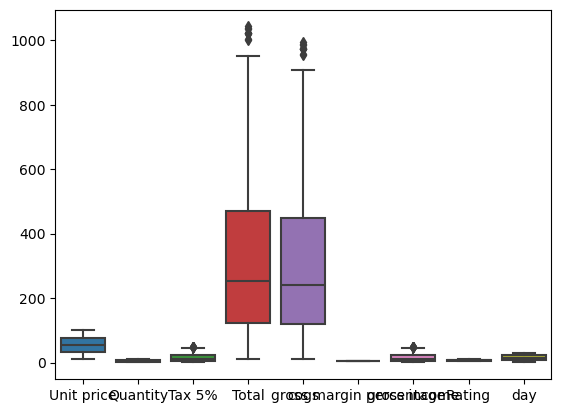

In [22]:

sns.boxplot(num)

<Axes: >

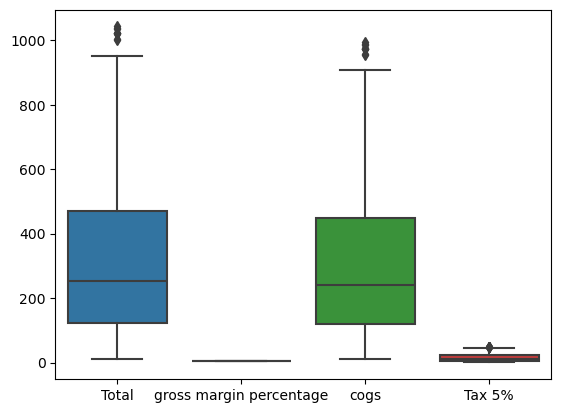

In [23]:
sns.boxplot(df[['Total','gross margin percentage','cogs','Tax 5%']])

# Here i extrect 25% quantile of numerical dataset and 75% 

In [24]:
q1=[num[i].quantile(0.25) for i in num.columns ]
q3=[num[i].quantile(0.75) for i in num.columns ]

# num data columns extracting

In [25]:
col=[ i for i in num.columns]

# Here i crate a dataframe of columns and quantile velues

In [26]:
box=pd.DataFrame({'columns':col,'25% quantile':q1,'75% quantile':q3})

In [27]:
box

,columns,25% quantile,75% quantile
0,Unit price,32.875000,77.935000
1,Quantity,3.000000,8.000000
2,Tax 5%,5.924875,22.445250
3,Total,124.422375,471.350250
4,cogs,118.497500,448.905000
5,gross margin percentage,4.761905,4.761905
6,gross income,5.924875,22.445250
7,Rating,5.500000,8.500000
8,day,8.000000,23.000000


# upper and lower fence  and iqr extract

In [28]:
box['IQR']=box['75% quantile']-box['25% quantile']
box

,columns,25% quantile,75% quantile,IQR
0,Unit price,32.875000,77.935000,4.506000e+01
1,Quantity,3.000000,8.000000,5.000000e+00
2,Tax 5%,5.924875,22.445250,1.652038e+01
3,Total,124.422375,471.350250,3.469279e+02
4,cogs,118.497500,448.905000,3.304075e+02
5,gross margin percentage,4.761905,4.761905,8.881784e-16
6,gross income,5.924875,22.445250,1.652038e+01
7,Rating,5.500000,8.500000,3.000000e+00
8,day,8.000000,23.000000,1.500000e+01


In [29]:

box['upper_fence']=box['75% quantile']+1.5*box['IQR']

box['lower_fence']=box['25% quantile']-1.5*box['IQR'] 


In [30]:
box

,columns,25% quantile,75% quantile,IQR,upper_fence,lower_fence
0,Unit price,32.875000,77.935000,4.506000e+01,145.525000,-34.715000
1,Quantity,3.000000,8.000000,5.000000e+00,15.500000,-4.500000
2,Tax 5%,5.924875,22.445250,1.652038e+01,47.225813,-18.855688
3,Total,124.422375,471.350250,3.469279e+02,991.742062,-395.969438
4,cogs,118.497500,448.905000,3.304075e+02,944.516250,-377.113750
5,gross margin percentage,4.761905,4.761905,8.881784e-16,4.761905,4.761905
6,gross income,5.924875,22.445250,1.652038e+01,47.225813,-18.855688
7,Rating,5.500000,8.500000,3.000000e+00,13.000000,1.000000
8,day,8.000000,23.000000,1.500000e+01,45.500000,-14.500000


# Here i chek correlation in numerical dataset  and visuslyzation

<Axes: >

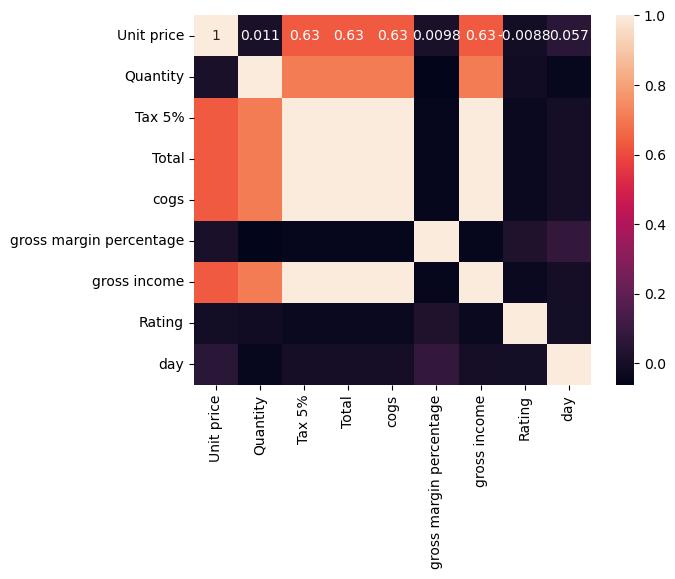

In [26]:


sns.heatmap(num.corr(),annot=True)

<Axes: >

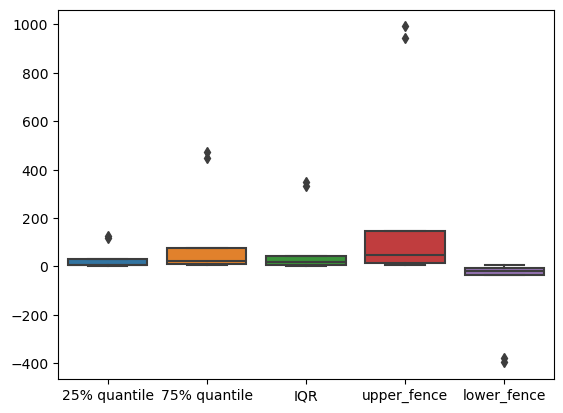

In [32]:
sns.boxplot(box)

In [33]:
df.shape

(1000, 18)

In [34]:
num.duplicated().sum()

0

In [35]:
num.isnull().sum()

Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
day                        0
dtype: int64

# outlior removal with the help of IQR methods

In [36]:
df1=df.copy()
for i in df.columns:
    
    if df[i].dtypes!='object':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        lower_fence=q1-1.5*iqr
        upper_fence=q3+1.5*iqr
        df1=df1[(df1[i]>=lower_fence) & (df1[i]<=upper_fence)]

In [37]:
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8


In [38]:
df.shape

(1000, 18)

In [39]:
df1.shape

(991, 18)

# the result after outlior clean

In [40]:
df1.shape[0]/df.shape[0]

0.991

<Axes: >

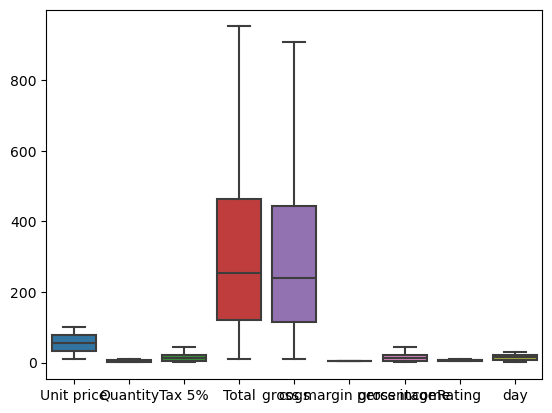

In [41]:
sns.boxplot(df1)

# Sum of Sales By branch

In [42]:
df1['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [43]:
branch=df1.groupby('Branch').agg({'Total':'sum'})
branch

,Total
Branch,
A,105161.0805
B,104152.7970
C,104441.4315


In [44]:
df1.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day'],
      dtype='object')

# Average Quantity by Coustomer type 

In [45]:
cs_type=df1.groupby('Customer type').agg({'Quantity':'mean'})
cs_type

,Quantity
Customer type,
Member,5.532129
Normal,5.405680


In [46]:
cs_type_max=df1.groupby('Customer type').agg({'Quantity':'max'})
cs_type_max

,Quantity
Customer type,
Member,10
Normal,10


# total sales by city

In [47]:
city=df1.groupby('City').agg({'Total':'sum'})
city

,Total
City,
Mandalay,104152.7970
Naypyitaw,104441.4315
Yangon,105161.0805


<Axes: xlabel='City', ylabel='Total'>

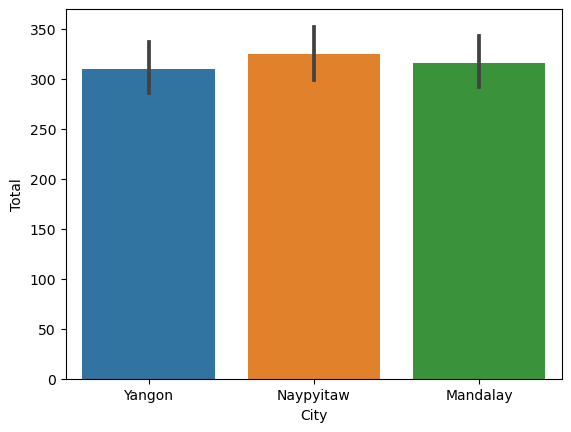

In [48]:
sns.barplot(x=df1.City,y=df1.Total)

# product v/s quantity

In [49]:
product=df1.groupby('Product line').agg({'Quantity':'sum'})
product

,Quantity
Product line,
Electronic accessories,971
Fashion accessories,872
Food and beverages,942
Health and beauty,854
Home and lifestyle,871
Sports and travel,910


In [50]:
product.mean()

Quantity    903.333333
dtype: float64

In [51]:
product.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,6.0,903.333333,45.998551,854.0,871.25,891.0,934.0,971.0


# sum of all product

In [52]:

df1['Product line'].value_counts()

Product line
Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        156
Health and beauty         152
Name: count, dtype: int64

# Each Coustomer type total sales record

In [53]:
df1['Customer type'].value_counts() 


Customer type
Member    498
Normal    493
Name: count, dtype: int64

# Visualyzing the total amount by invoice

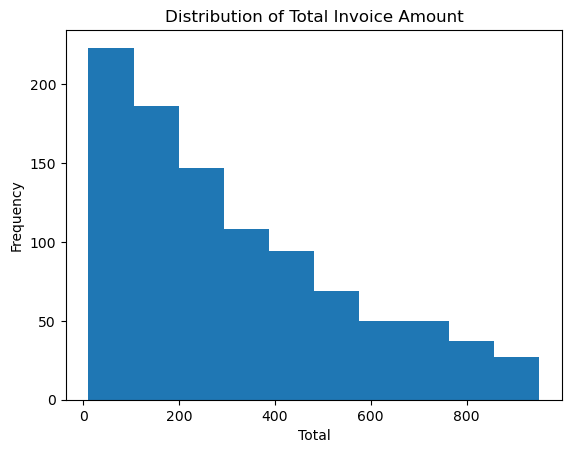

In [54]:
plt.hist(df1['Total'], bins=10)
plt.title('Distribution of Total Invoice Amount')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show() 

# Total Invoice amount by coustomer type

In [55]:
df1.groupby('Customer type').agg({'Total':'sum'})

,Total
Customer type,
Member,161125.629
Normal,152629.680


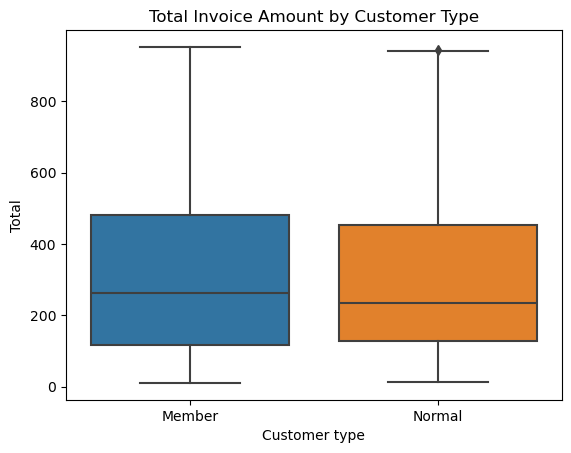

In [56]:
sns.boxplot(x='Customer type', y='Total', data=df1)
plt.title('Total Invoice Amount by Customer Type')
plt.show()

# count of invoice by product

In [57]:
df1['Product line'].value_counts()

Product line
Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        156
Health and beauty         152
Name: count, dtype: int64

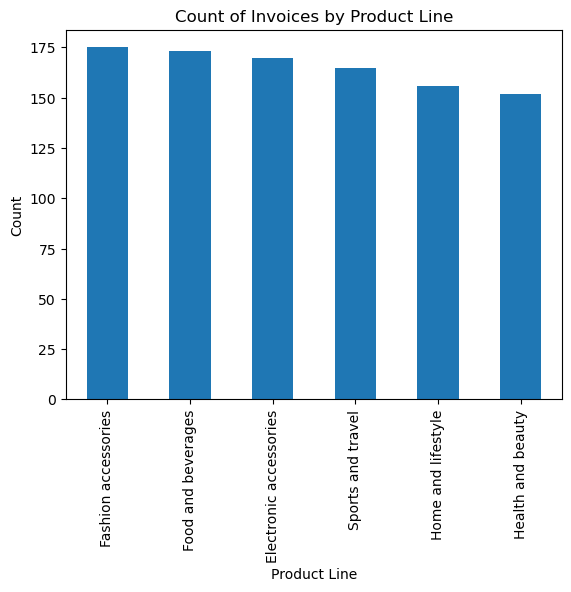

In [58]:
df1['Product line'].value_counts().plot(kind='bar')
plt.title('Count of Invoices by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

# Product line and unit price group by acording to quantity

In [59]:
df1.groupby('Product line').agg({'Unit price':'sum','Quantity':'sum'})

,Unit price,Quantity
Product line,,
Electronic accessories,9103.77,971
Fashion accessories,9877.86,872
Food and beverages,9647.02,942
Health and beauty,8337.88,854
Home and lifestyle,8462.88,871
Sports and travel,9365.44,910


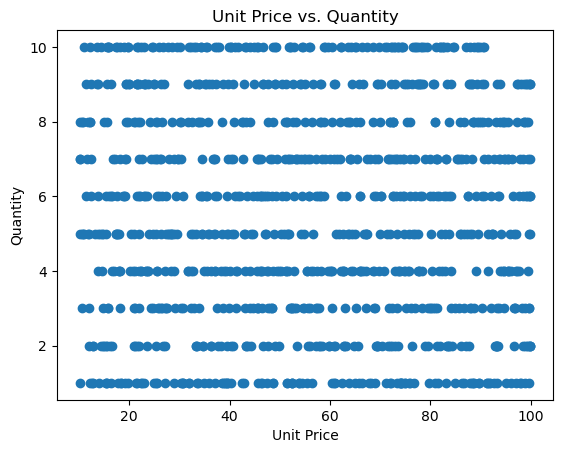

In [60]:
plt.scatter(df1['Unit price'], df1['Quantity'])
plt.title('Unit Price vs. Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

# Total Invoice amount generate by Gender

             Total
Gender            
Female  161738.115
Male    152017.194


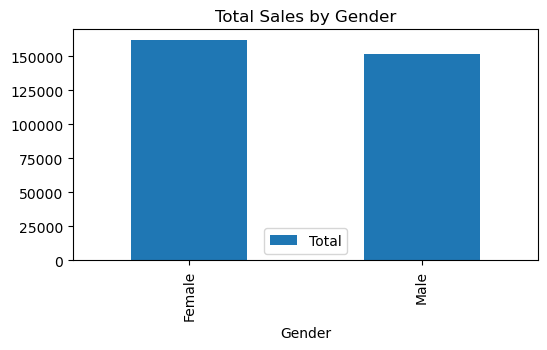

In [61]:
gender_sum=df1.groupby('Gender').agg({'Total':'sum'})
gender_sum.plot(kind='bar', figsize=(6, 3), title='Total Sales by Gender')
print(gender_sum)

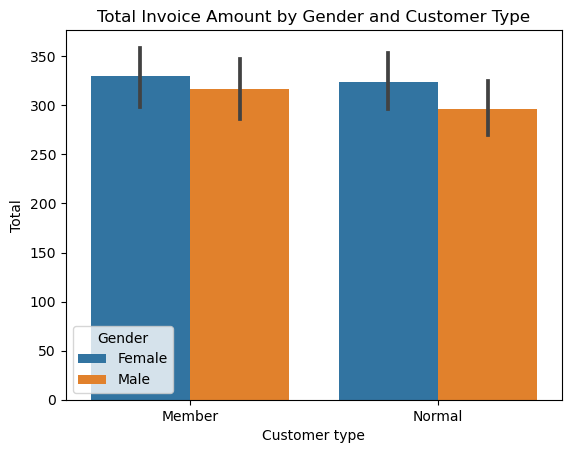

In [62]:
sns.barplot(x='Customer type', y='Total', hue='Gender', data=df1)
plt.title('Total Invoice Amount by Gender and Customer Type')
plt.show()

# Total invoice Amount by date

In [63]:
df1.groupby('Date').agg({'Total':'sum','Invoice ID':'count'}).head(10)


,Total,Invoice ID
Date,,
2019-01-01,4745.1810,12
2019-01-02,1945.5030,8
2019-01-03,2078.1285,8
2019-01-04,1623.6885,6
2019-01-05,3536.6835,12
2019-01-06,3614.2050,9
2019-01-07,2834.2440,9
2019-01-08,5293.7325,18
2019-01-09,2019.2235,7


# Top 5 product line Generate higest Amount

In [64]:

top_5_prod = df1.groupby('Product line')['Total'].sum().nlargest(5)
top_5_prod

Product line
Food and beverages        55110.3840
Electronic accessories    54337.5315
Sports and travel         54120.7065
Fashion accessories       51203.2500
Home and lifestyle        49789.6980
Name: Total, dtype: float64

# higest amount generate by city

In [65]:
top_performing_city = df1.groupby('City')['Total'].sum().nlargest(3)
top_performing_city

City
Yangon       105161.0805
Naypyitaw    104441.4315
Mandalay     104152.7970
Name: Total, dtype: float64

# Top performing Branch and Genrate higest Amount of Sales

In [66]:
top_performing_branches = df1.groupby('Branch')['Total'].sum().nlargest(3)
top_performing_branches

Branch
A    105161.0805
C    104441.4315
B    104152.7970
Name: Total, dtype: float64

# Values Count By Branch

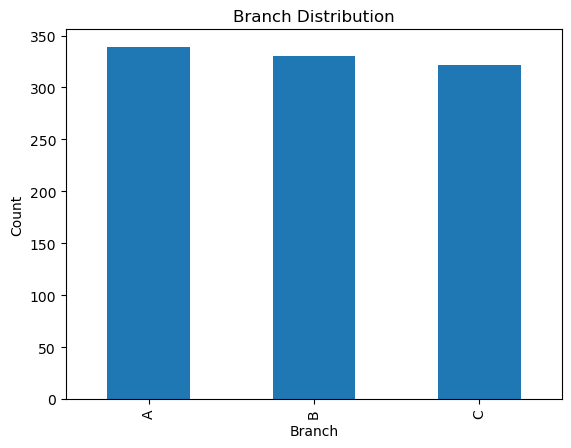

Customer type
Member    501
Normal    499
Name: count, dtype: int64


In [67]:
# Bar charts
df1['Branch'].value_counts().plot(kind='bar')
plt.title('Branch Distribution')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.show()


print(df['Customer type'].value_counts())

# Payment Method by Branch with the help of cross tabulation

In [68]:
df1.groupby('Branch').agg({'Payment':'count'})

,Payment
Branch,
A,339
B,330
C,322


In [69]:
df1.groupby('Payment').agg({'Branch':'count'})

,Branch
Payment,
Cash,342
Credit card,307
Ewallet,342


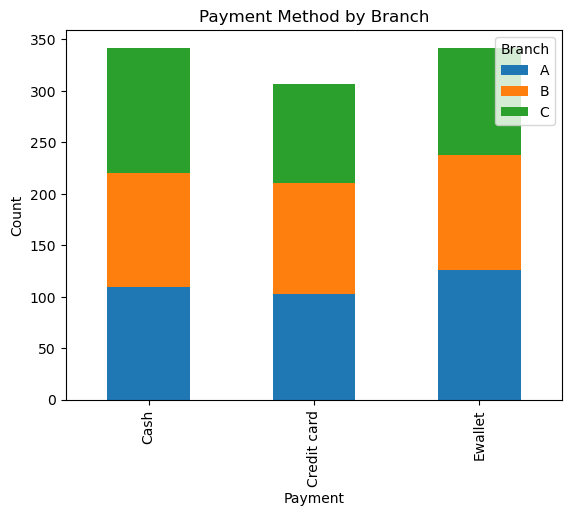

In [70]:
pd.crosstab(df1['Payment'], df1['Branch']).plot(kind='bar', stacked=True)
plt.title('Payment Method by Branch')
plt.xlabel('Payment')
plt.ylabel('Count')
plt.show()

# Payment method using and its total sum

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64


<Axes: title={'center': 'Payment Method Usage'}, ylabel='Total'>

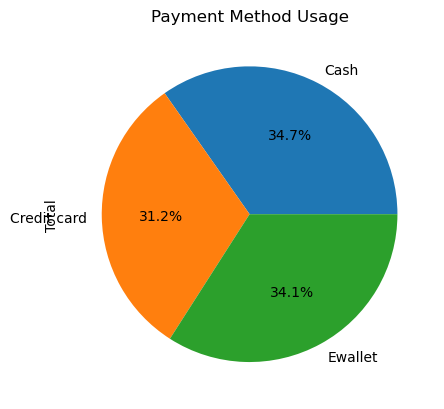

In [71]:
payment_method_usage = df.groupby('Payment')['Total'].sum()
print(payment_method_usage)
payment_method_usage.plot(kind='pie', autopct='%1.1f%%', title='Payment Method Usage');

# Quantity and his Total sum of Max

In [72]:
df1.groupby('Quantity')['Total'].max()

Quantity
1     104.6745
2     209.7690
3     314.0550
4     417.5640
5     523.8450
6     629.4960
7     734.7060
8     836.3040
9     944.6220
10    951.8250
Name: Total, dtype: float64

<Axes: xlabel='Quantity', ylabel='Total'>

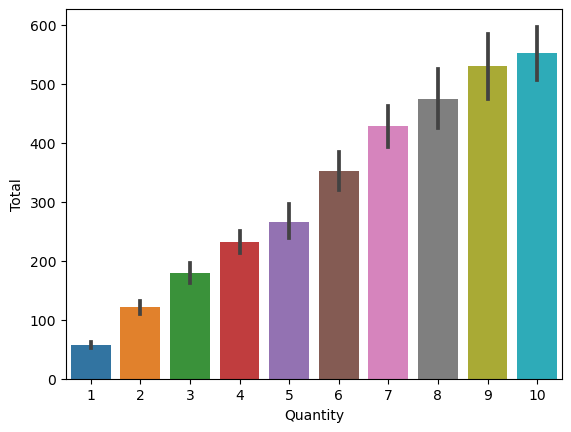

In [73]:
sns.barplot(x='Quantity',y='Total',data=df1)

# Here i chek Product and his COGS and Gross Income and Total Sales

In [74]:
df1.groupby('Product line').agg({'cogs':'sum','gross income':'sum','Total':'sum'})

,cogs,gross income,Total
Product line,,,
Electronic accessories,51750.03,2587.5015,54337.5315
Fashion accessories,48765.00,2438.2500,51203.2500
Food and beverages,52486.08,2624.3040,55110.3840
Health and beauty,46851.18,2342.5590,49193.7390
Home and lifestyle,47418.76,2370.9380,49789.6980
Sports and travel,51543.53,2577.1765,54120.7065


# Average product Buying by Coustomer typs

In [75]:
avg_product_purchase= df1.groupby('Customer type')['Total'].mean()
print("\nAverage product  Purchase Amount by Customer Type:")
print(avg_product_purchase)



Average product  Purchase Amount by Customer Type:
Customer type
Member    323.545440
Normal    309.593671
Name: Total, dtype: float64


# higest Product buying by gender

In [76]:
pd_gender = df1.groupby(['Gender', 'Product line'])['Quantity'].sum()

print(pd_gender)


Gender  Product line          
Female  Electronic accessories    488
        Fashion accessories       510
        Food and beverages        504
        Health and beauty         343
        Home and lifestyle        478
        Sports and travel         486
Male    Electronic accessories    483
        Fashion accessories       362
        Food and beverages        438
        Health and beauty         511
        Home and lifestyle        393
        Sports and travel         424
Name: Quantity, dtype: int64


#  Average Rating by Branch

In [77]:

avg_rating_by_branch = df1.groupby('Branch')['Rating'].mean()
print("\nAverage Rating by Branch:")
print(avg_rating_by_branch)





Average Rating by Branch:
Branch
A    7.022124
B    6.831212
C    7.087267
Name: Rating, dtype: float64


<Axes: >

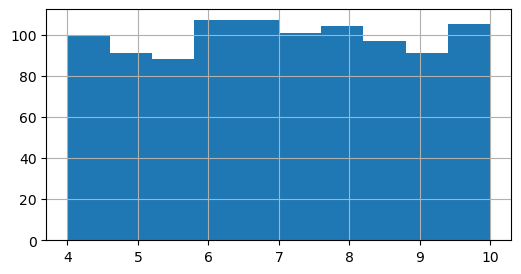

In [78]:
df1['Rating'].hist(bins=10, figsize=(6, 3))

# Purchase Frequency by Customer Type


In [79]:
purchase_frequency_by_type = df1.groupby('Customer type')['Invoice ID'].nunique()
print("\nPurchase Frequency by Customer Type:")
print(purchase_frequency_by_type)



Purchase Frequency by Customer Type:
Customer type
Member    498
Normal    493
Name: Invoice ID, dtype: int64


# sales analysis by branch and product line

In [80]:

sales_by_branch_product = df1.groupby(['Branch', 'Product line'])['Total'].sum()
sales_by_branch_product

Branch  Product line          
A       Electronic accessories    18317.1135
        Fashion accessories       15293.2185
        Food and beverages        17163.1005
        Health and beauty         12597.7530
        Home and lifestyle        22417.1955
        Sports and travel         19372.6995
B       Electronic accessories    17051.4435
        Fashion accessories       16413.3165
        Food and beverages        15214.8885
        Health and beauty         19980.6600
        Home and lifestyle        15504.2895
        Sports and travel         19988.1990
C       Electronic accessories    18968.9745
        Fashion accessories       19496.7150
        Food and beverages        22732.3950
        Health and beauty         16615.3260
        Home and lifestyle        11868.2130
        Sports and travel         14759.8080
Name: Total, dtype: float64

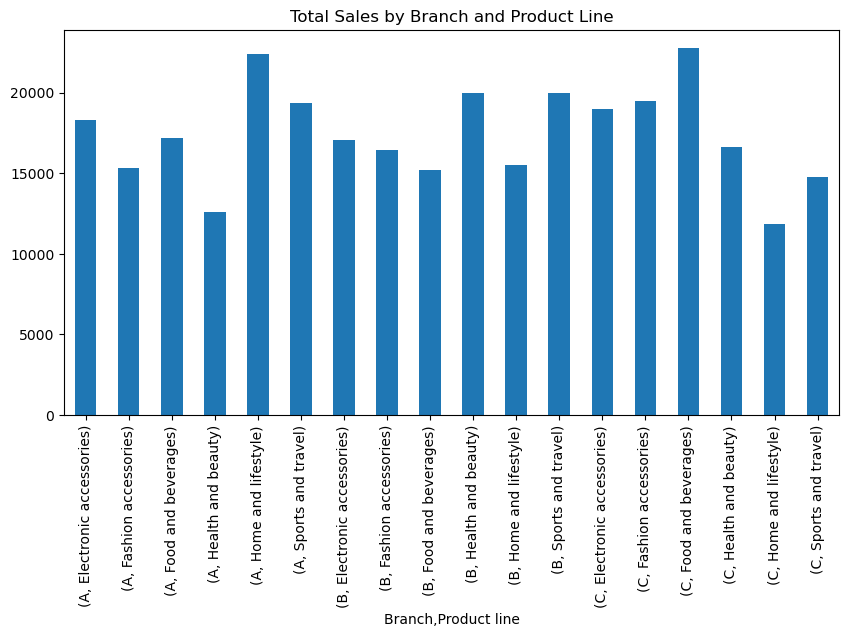

In [81]:
sales_by_branch_product.plot(kind='bar', figsize=(10, 5), title='Total Sales by Branch and Product Line')
plt.show()

# . Average Sales By Customer Segmentation Analysis

In [82]:
customer_segmentation = df1.groupby('Customer type')['Total'].mean()
customer_segmentation 

Customer type
Member    323.545440
Normal    309.593671
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales By costomer segment')

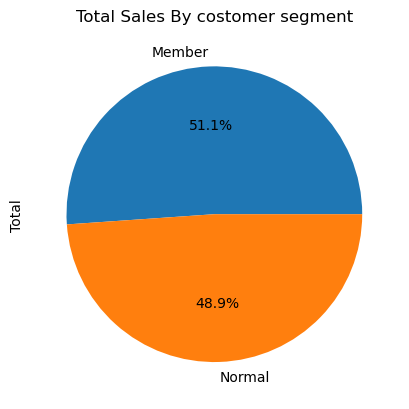

In [83]:
customer_segmentation.plot(kind='pie', autopct='%1.1f%%')
plt.title("Total Sales By costomer segment")

#  cheak  Product Line Performance

In [84]:
product_line_performance = df1.groupby('Product line')['Total'].sum()
product_line_performance

Product line
Electronic accessories    54337.5315
Fashion accessories       51203.2500
Food and beverages        55110.3840
Health and beauty         49193.7390
Home and lifestyle        49789.6980
Sports and travel         54120.7065
Name: Total, dtype: float64

<Axes: title={'center': 'Total Sales by Product Line'}, xlabel='Product line'>

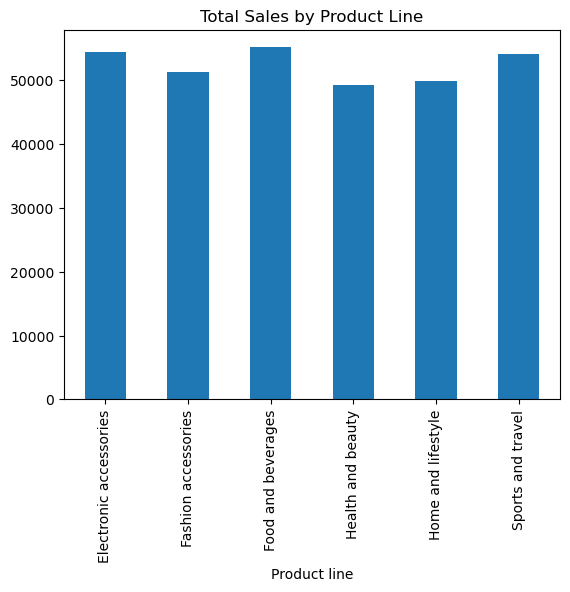

In [85]:
product_line_performance.plot(kind='bar', title='Total Sales by Product Line')

# 5. Average off Total Value

In [86]:
 df1['Total'].mean()

316.60475176589307

# mothly wise sales group by Total

In [87]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df1.groupby(df['Date'].dt.to_period('M'))['Total'].sum()
monthly_sales

Date
2019-01    111205.563
2019-02     94116.729
2019-03    108433.017
Freq: M, Name: Total, dtype: float64

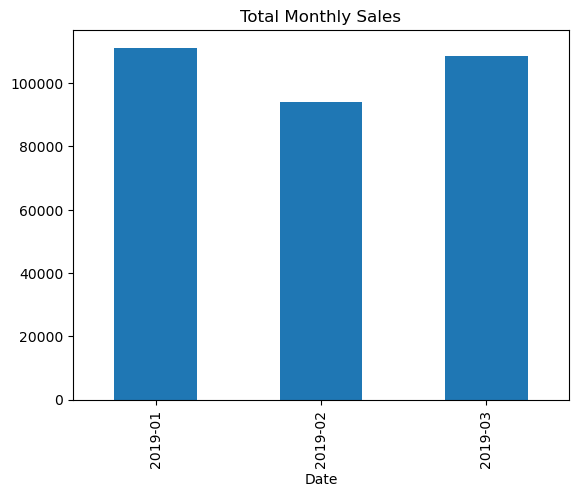

In [88]:

monthly_sales.plot(kind='bar', title='Total Monthly Sales')
plt.show()


In [89]:
df1.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day'],
      dtype='object')

# correlation between Unit price and Total

<Axes: >

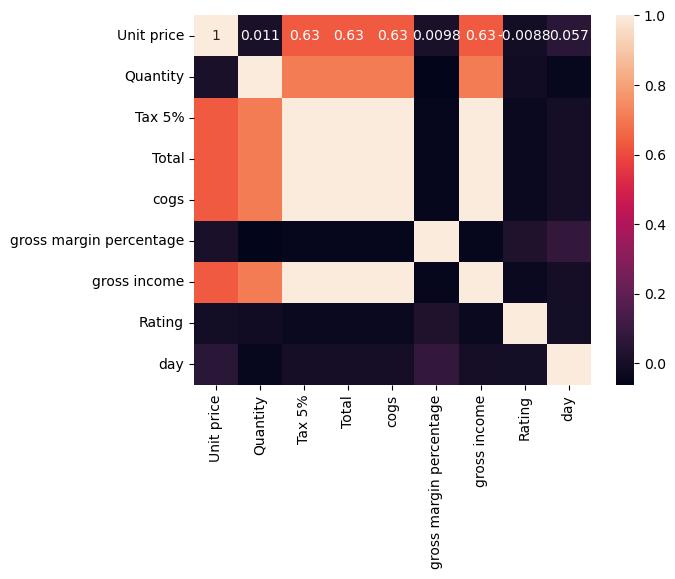

In [90]:
sns.heatmap(num.corr(),annot=True)

In [91]:
df1[['Unit price','Total']].corr()

,Unit price,Total
Unit price,1.000000,0.623355
Total,0.623355,1.000000


In [92]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day'],
      dtype='object')

# ROI

In [93]:
total_sales = df['Total'].sum()
total_cogs = df['cogs'].sum()
gross_income = total_sales - total_cogs
avg_gross_margin_percentage = df['gross margin percentage'].mean()

print("total Sales = ",total_sales)
print("Total COGS = ",total_cogs)
print('avg_gross_margin_percentage =',avg_gross_margin_percentage)


total Sales =  322966.749
Total COGS =  307587.38
avg_gross_margin_percentage = 4.761904761904762



# Define good and bad sales based on the average gross margin percentage

In [94]:
good_sales = df[df['gross margin percentage'] > avg_gross_margin_percentage]
bad_sales = df[df['gross margin percentage'] <= avg_gross_margin_percentage]
good_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,25
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8,25
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38:00,Ewallet,735.60,4.761905,36.7800,8.0,24
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27:00,Credit card,164.52,4.761905,8.2260,5.9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,2019-01-03,19:08:00,Credit card,496.00,4.761905,24.8000,6.2,3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,2019-01-28,15:46:00,Credit card,602.96,4.761905,30.1480,8.4,28
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06:00,Credit card,282.80,4.761905,14.1400,4.5,22
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,29


In [95]:
bad_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15:00,Credit card,72.52,4.761905,3.6260,7.2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22,18:35:00,Ewallet,174.90,4.761905,8.7450,6.6,22
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40:00,Ewallet,60.95,4.761905,3.0475,5.9,18
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,9


In [96]:
good_sales['Invoice ID'].count()

423

In [97]:
bad_sales['Invoice ID'].count()

577

<module 'matplotlib.pyplot' from 'C:\\Users\\kunda\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

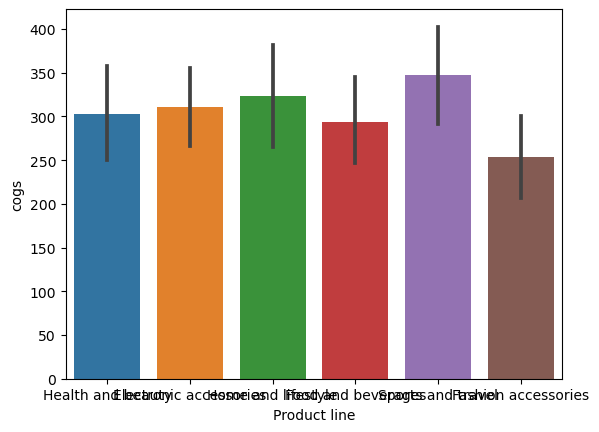

In [124]:
figure=figsize=(15,9)
sns.barplot(x=good_sales['Product line'],y=good_sales['cogs'])
plt

# Here my all insight about this dataset